### 1. Import

In [3]:
# import libs
import glob
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from tqdm import tqdm

### 2. Data preparation

In [4]:
activity_folders = ['idle', 'running', 'walking', 'stairs']
path_data = 'data'

Read the files from the directory

In [5]:
def get_files(path_to, folder):
    custom_path = os.path.join(path_to, activity_folders[folder], '*.csv')
    filenames = glob.glob(custom_path)
    return filenames

In [6]:
idle_filenames = get_files(path_data, 0)
running_filenames = get_files(path_data, 1)
walking_filenames = get_files(path_data, 2)
stairs_filenames = get_files(path_data, 3)

count how many data files

In [7]:
print("There are:\n {0} idle {4}\n {1} running {4}\n {2} stairs {4}\n {3} walking {4}\n ".format(len(idle_filenames), len(running_filenames), len(stairs_filenames), len(walking_filenames), 'files'))

There are:
 1039 idle files
 3408 running files
 165 stairs files
 1850 walking files
 


Function to get files data, add the data to dataframe, calculate mean and standard deviation

In [9]:
def get_file_data(filenames):
    regex = re.compile('^[a-zA-Z]*')
    li = []
    for f in filenames:
        full_name = os.path.basename(f)
        df = pd.read_csv(f, index_col=None, header=0)

        # calculate mean and standard deviation value for coordinates in each file with activity
        ndf = df.copy().to_numpy()

        column_means = ndf.mean(axis=0)
        df['X_mean'] = column_means[0]
        df['Y_mean'] = column_means[1]
        df['Z_mean'] = column_means[2]

        column_stdev = ndf.std(axis=0)
        df['X_stdev'] = column_stdev[0]
        df['Y_stdev'] = column_stdev[1]
        df['Z_stdev'] = column_stdev[2]

        # adding label and source filename to the DF
        new_name = regex.match(full_name).group()

        # adding label to the DF
        df['label'] = new_name
        df['filename'] = full_name

        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    return  df

In [10]:
dataframes = []

**Get idle accelerometer data**

In [11]:
for i in tqdm(range(25), desc='Progress'):
    df_idle_data = get_file_data(idle_filenames)
df_idle_data.head()
dataframes.append(df_idle_data)

Progress: 100%|██████████| 25/25 [02:46<00:00,  6.68s/it]


**Get running accelerometer data**

In [12]:
for i in tqdm(range(25), desc='Progress'):
    df_running_data = get_file_data(running_filenames)
df_running_data.head()
dataframes.append(df_running_data)

Progress: 100%|██████████| 25/25 [07:25<00:00, 17.83s/it]


**Get stairs accelerometer data**

In [13]:
for i in tqdm(range(25), desc='Progress'):
    df_stairs_data = get_file_data(stairs_filenames)
df_stairs_data.head()
dataframes.append(df_stairs_data)

Progress: 100%|██████████| 25/25 [00:43<00:00,  1.73s/it]


**Get walking accelerometer data**

In [14]:
for i in tqdm(range(25), desc='Progress'):
    df_walking_data = get_file_data(walking_filenames)
df_walking_data.head()
dataframes.append(df_walking_data)

Progress: 100%|██████████| 25/25 [05:16<00:00, 12.65s/it]


In [15]:
dataframes_merged = pd.concat(objs=dataframes, axis=0, ignore_index=True)

In [16]:
dataframes_merged.tail()

,accelerometer_X,accelerometer_Y,accelerometer_Z,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
193855,5.109226,-15.452178,-1.470040,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193856,6.373365,-11.741165,-8.226476,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193857,3.289633,-9.993398,-0.383072,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193858,-2.978387,-3.050213,1.273715,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv
193859,-4.347870,-9.926360,-1.642422,1.131979,-10.937192,0.26017,4.141624,5.351603,7.808017,walking,walking-999.csv


In [17]:
columns_to_keep = ['X_mean',
       'Y_mean', 'Z_mean', 'X_stdev', 'Y_stdev', 'Z_stdev', 'label',
       'filename']
df_summary = dataframes_merged[columns_to_keep]

In [18]:
df_summary = df_summary.drop_duplicates(ignore_index=True)

In [19]:
print(df_summary.shape)
df_summary.tail()

(6462, 8)


,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
6457,0.396639,-10.702081,-0.202230,3.415728,5.196475,8.520994,walking,walking-995.csv
6458,0.418028,-10.736398,-0.090980,3.474532,5.240406,8.529988,walking,walking-996.csv
6459,1.151771,-10.878295,0.364557,3.881676,5.321559,7.731478,walking,walking-997.csv
6460,1.551123,-11.146126,0.233036,3.949419,5.205216,7.809926,walking,walking-998.csv
6461,1.131979,-10.937192,0.260170,4.141624,5.351603,7.808017,walking,walking-999.csv


calculate how many observations of each activity type

In [20]:
print(df_idle_data['label'].value_counts())
print(df_running_data['label'].value_counts())
print(df_stairs_data['label'].value_counts())
print(df_walking_data['label'].value_counts())

idle    31170
Name: label, dtype: int64
running    102240
Name: label, dtype: int64
stairs    4950
Name: label, dtype: int64
walking    55500
Name: label, dtype: int64


### 3. Visualize data

**Visualize accelerometer data of the entire dataset per activity type**

In [21]:
# Plots are X, Y, Z acceleration amplitudes of 4 activities.
import matplotlib.pyplot as plt

def plot_xyz_output(x, y, z, title_x, title_y, title_z):
    fig, axs = plt.subplots(3,1, figsize=(14,12))
    plt.subplots_adjust(hspace=0.5)
    axs[0].plot(x)
    axs[0].set_title(title_x)
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('A[m/s^2]')
    axs[1].plot(y)
    axs[1].set_title(title_y)
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('A[m/s^2]')
    axs[2].plot(z)
    axs[2].set_title(title_z)
    axs[2].set_xlabel('Samples')
    axs[2].set_ylabel('A[m/s^2]')
    plt.show()

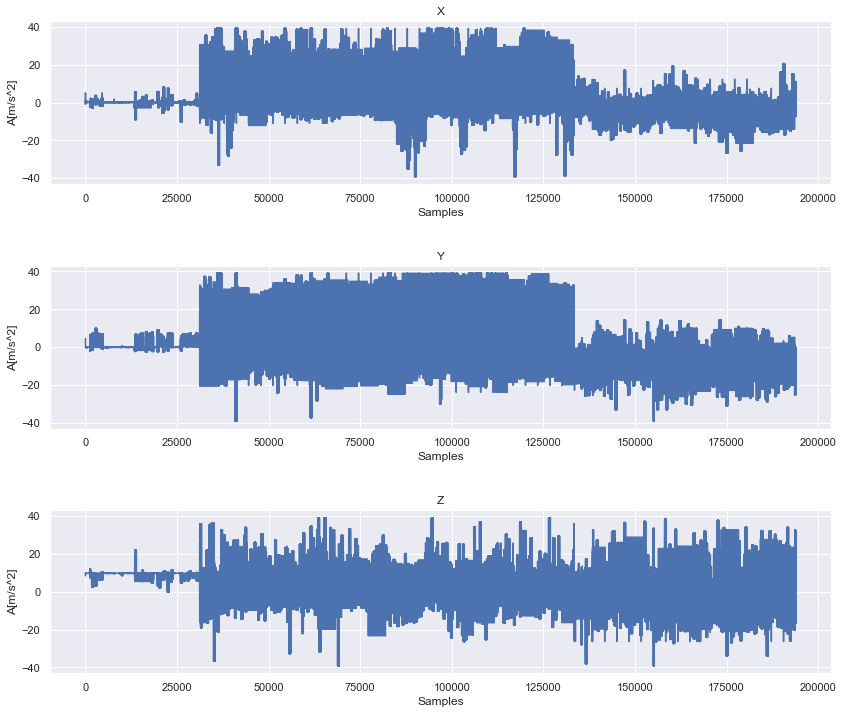

In [22]:
plot_xyz_output(x = dataframes_merged['accelerometer_X'], y = dataframes_merged['accelerometer_Y'], z = dataframes_merged['accelerometer_Z'], title_x='X', title_y= 'Y', title_z= 'Z')


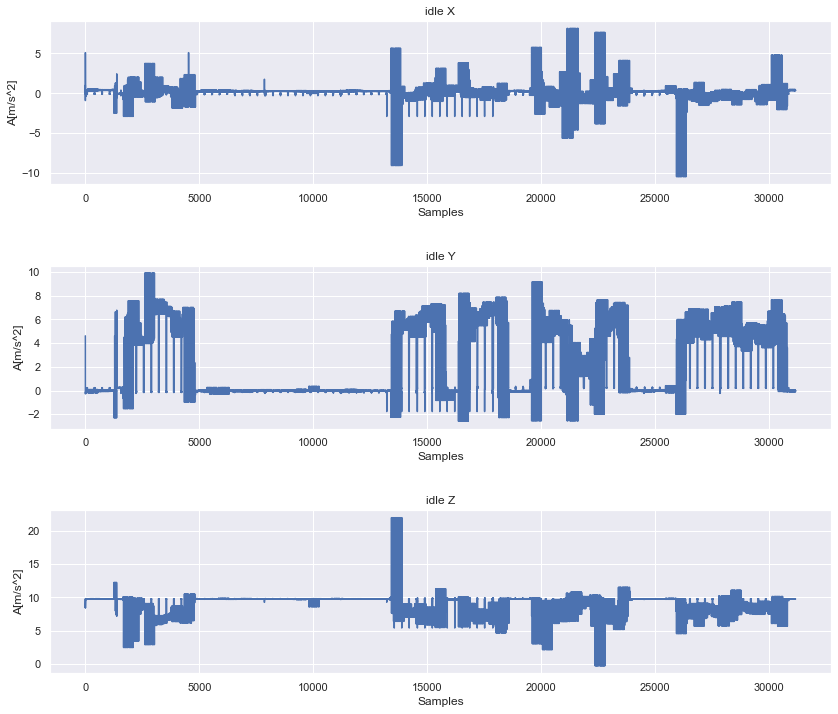

In [23]:
plot_xyz_output(x = df_idle_data['accelerometer_X'], y = df_idle_data['accelerometer_Y'], z = df_idle_data['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

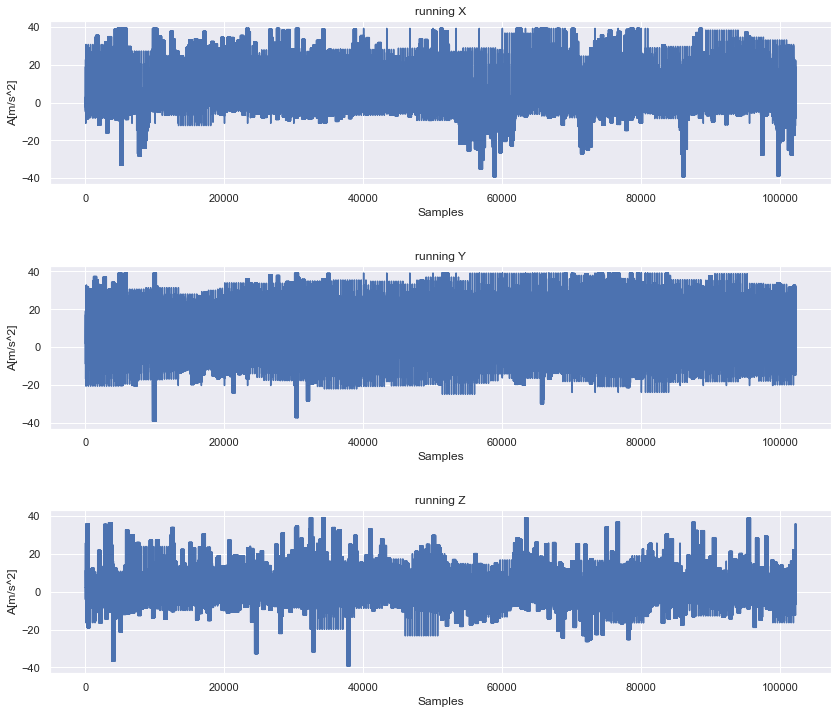

In [24]:
plot_xyz_output(x = df_running_data['accelerometer_X'], y = df_running_data['accelerometer_Y'], z = df_running_data['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

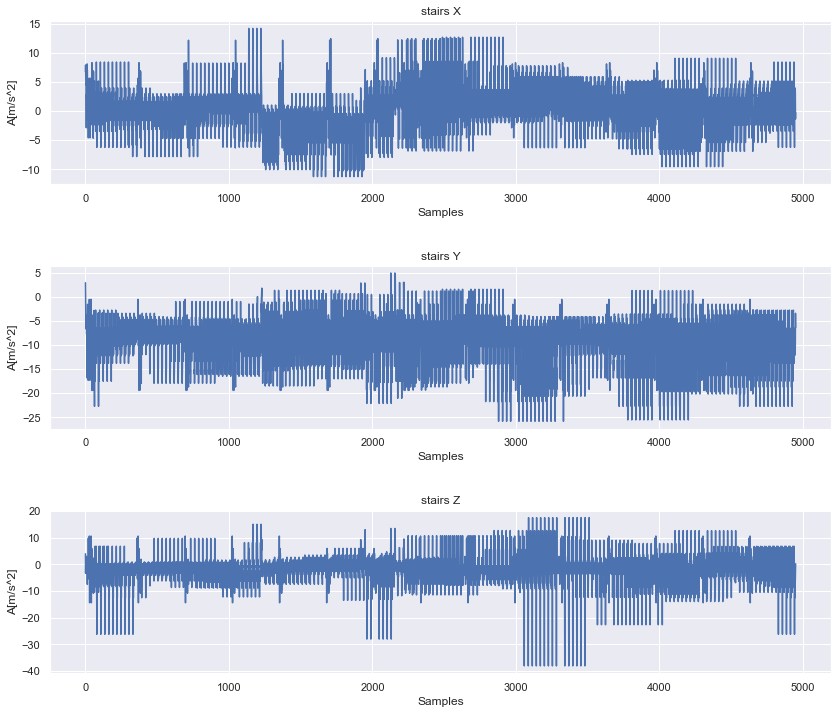

In [25]:
plot_xyz_output(x = df_stairs_data['accelerometer_X'], y = df_stairs_data['accelerometer_Y'], z = df_stairs_data['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

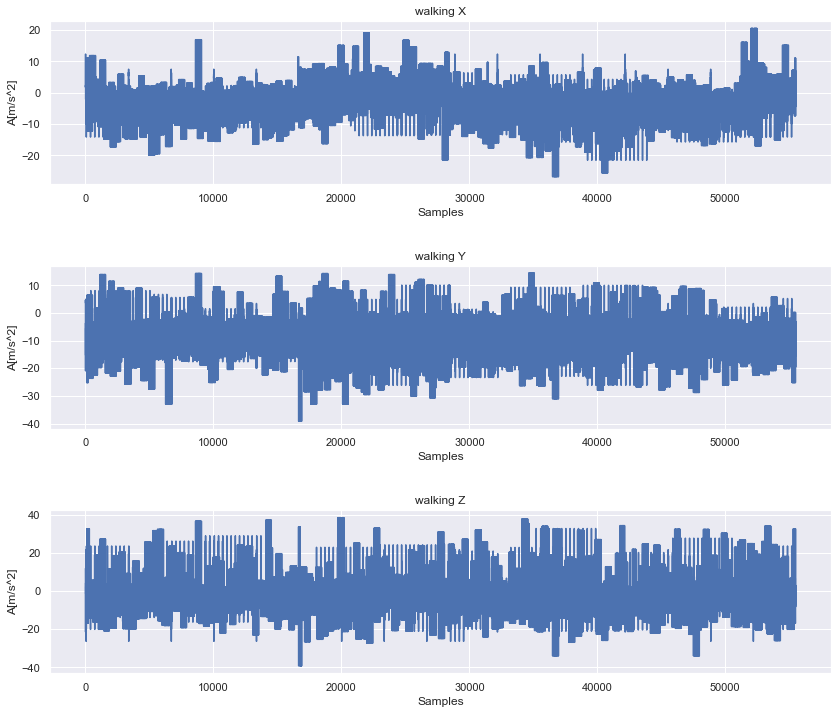

In [26]:
plot_xyz_output(x = df_walking_data['accelerometer_X'], y = df_walking_data['accelerometer_Y'], z = df_walking_data['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

#### visualize accelerometer data frequency of 1 random sample file

In [27]:
import random as rand
random_idle_file_index = rand.randint(0, df_idle_data['label'].value_counts().loc['idle'])
rand_idle_file = df_idle_data.iloc[random_idle_file_index].loc['filename']
rand_idle_file = df_idle_data[df_idle_data['filename'] == rand_idle_file]
rand_idle_file

,accelerometer_X,accelerometer_Y,accelerometer_Z,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
30180,-0.110133,0.234632,9.768343,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30181,-0.100556,0.220267,9.777920,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30182,-0.100556,0.205901,9.758766,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30183,-0.076614,0.244209,9.734824,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30184,-0.095768,0.220267,9.768343,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30185,-0.100556,0.205901,9.782708,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30186,-0.095768,0.234632,9.763555,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30187,-0.086191,0.234632,9.753978,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30188,-0.105345,0.225055,9.753978,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv
30189,-0.086191,0.234632,9.777920,-0.097843,0.220107,9.768503,0.015227,0.016331,0.014177,idle,idle-97.csv


In [28]:
import random as rand

def get_random_file(dataframe, activity_type):
    # generate random index between 0 and the maximum value index of the dataframe
    random_file_index = rand.randint(0, dataframe['label'].value_counts().loc[activity_type])
    # get the filename behind the generated index
    rand_file = dataframe.iloc[random_file_index].loc['filename']
    # filter the dataframe by the defined filename and create a new dataframe
    df_rand_file = dataframe[dataframe['filename'] == rand_file]
    return df_rand_file

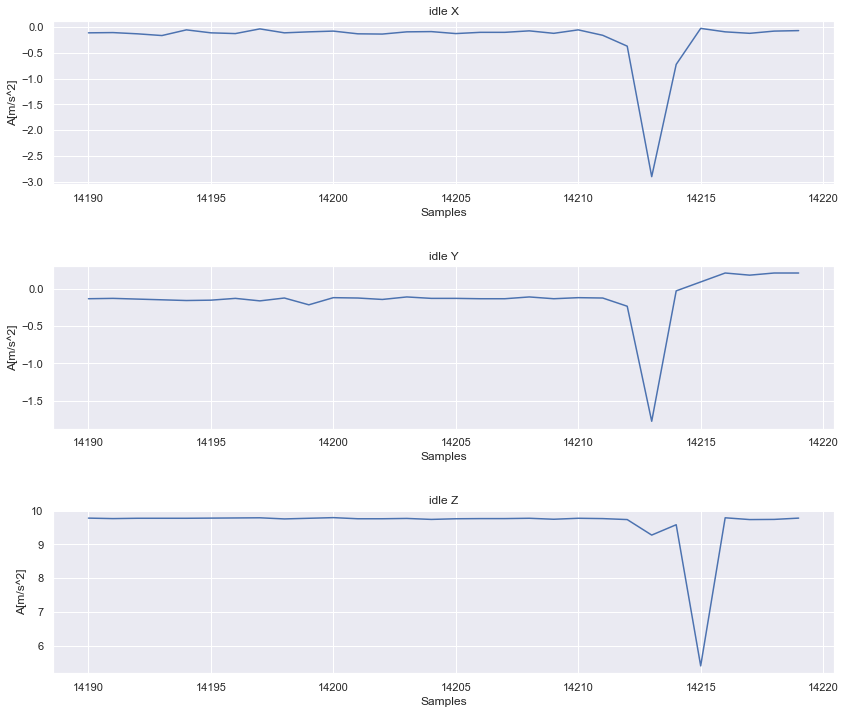

In [29]:
df_1_idle = get_random_file(df_idle_data, 'idle')
plot_xyz_output(x = df_1_idle['accelerometer_X'], y = df_1_idle['accelerometer_Y'], z = df_1_idle['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

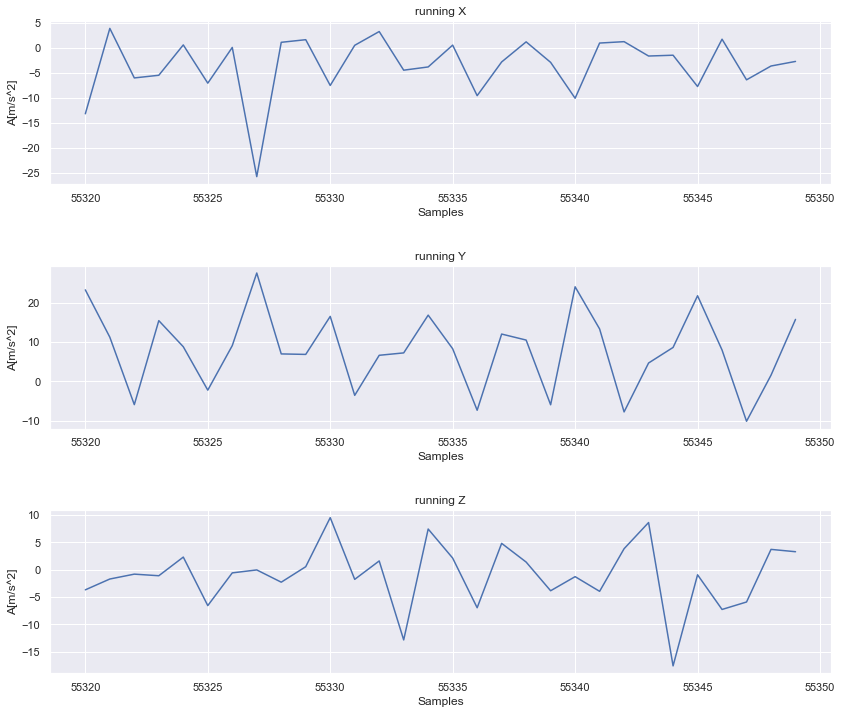

In [30]:
df_1_run = get_random_file(df_running_data, 'running')
plot_xyz_output(x = df_1_run['accelerometer_X'], y = df_1_run['accelerometer_Y'], z = df_1_run['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

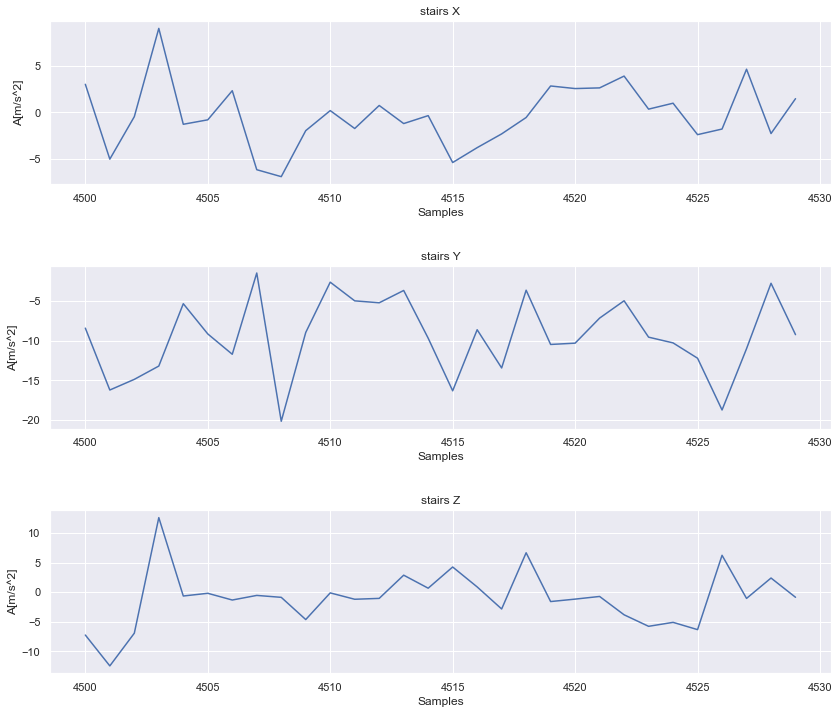

In [31]:
df_1_stair = get_random_file(df_stairs_data, 'stairs')
plot_xyz_output(x = df_1_stair['accelerometer_X'], y = df_1_stair['accelerometer_Y'], z = df_1_stair['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

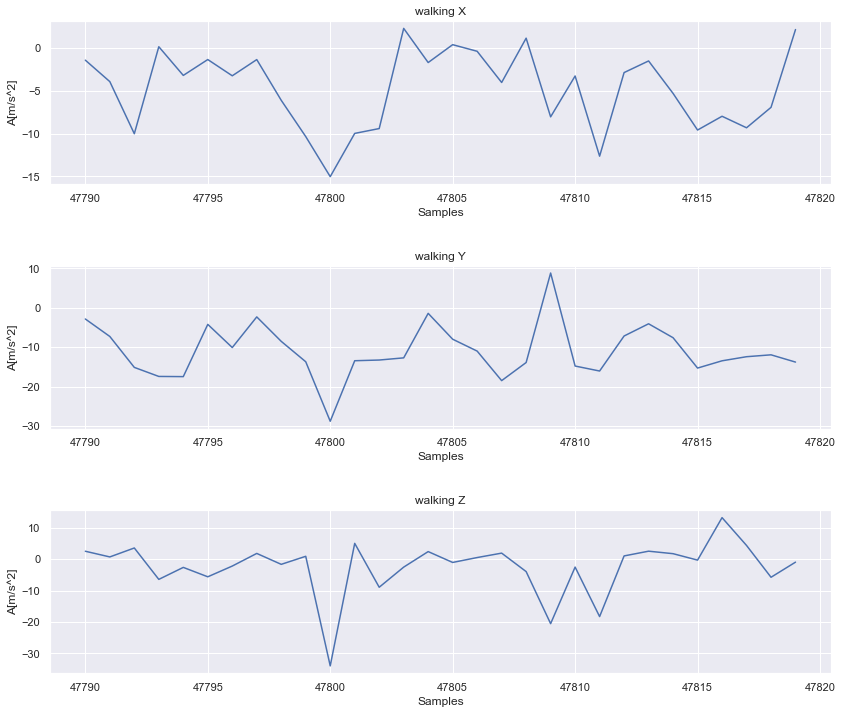

In [32]:
df_1_walk = get_random_file(df_walking_data, 'walking')
plot_xyz_output(x = df_1_walk['accelerometer_X'], y = df_1_walk['accelerometer_Y'], z = df_1_walk['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

#### visualize spectrum of accelerometer X idle activity type

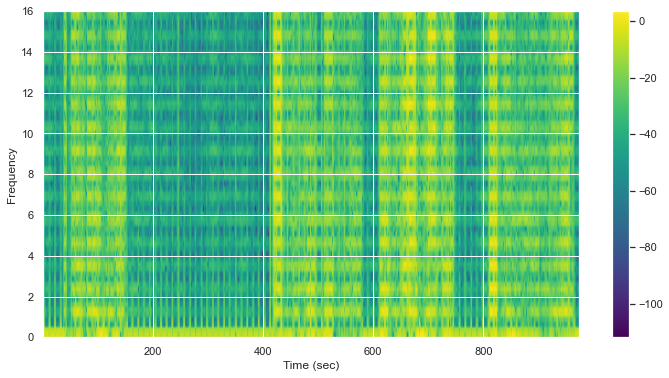

In [40]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

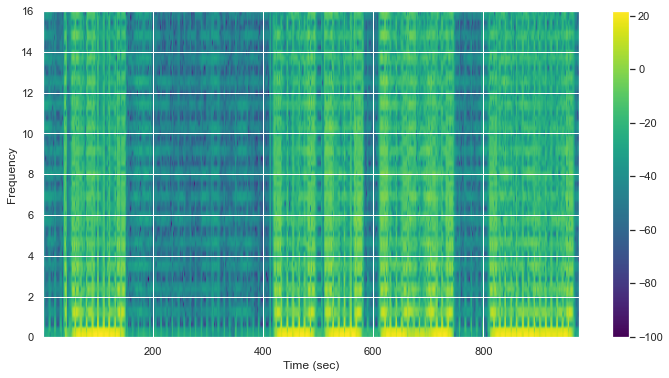

In [41]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Y'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

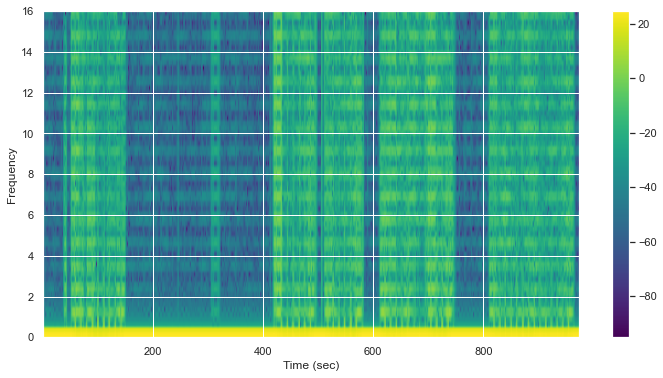

In [42]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Z'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

<ipython-input-43-7109f067aed9>:4: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=30).
  powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')


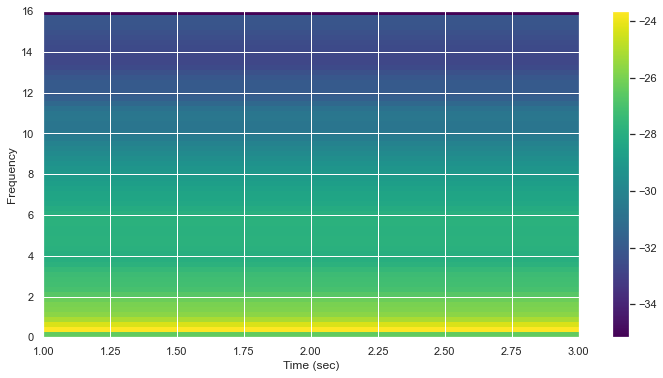

In [43]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

<ipython-input-44-e8ad386af7ee>:4: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=30).
  powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_Y'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')


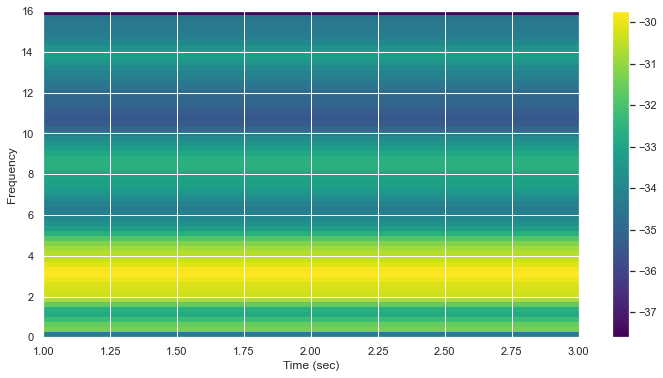

In [44]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_Y'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

<ipython-input-45-419d3ce93ef1>:4: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=30).
  powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_Z'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')


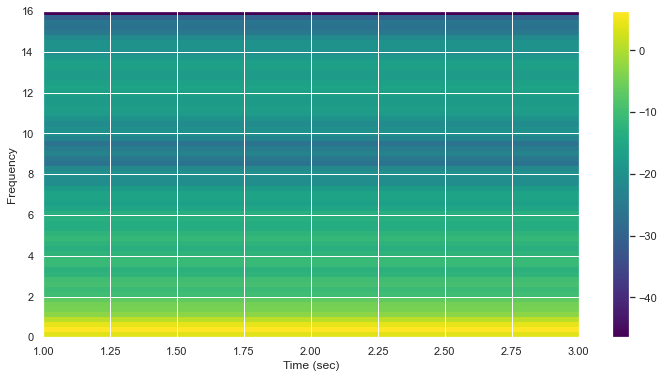

In [45]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_Z'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [54]:
from scipy import fftpack
from numpy.fft import fft
def new_display_fft(signal, sampling_freq, title):
    N = signal.shape[0]
    yf = fft(signal)
    f_s = sampling_freq
    yf = np.abs(yf) * 2.0 / N  # Normalize the wave
    xf = fftpack.fftfreq(len(signal)) * f_s
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    ax.set_xlim(0, sampling_freq / 2)
    ax.plot(xf,yf)
    plt.show()

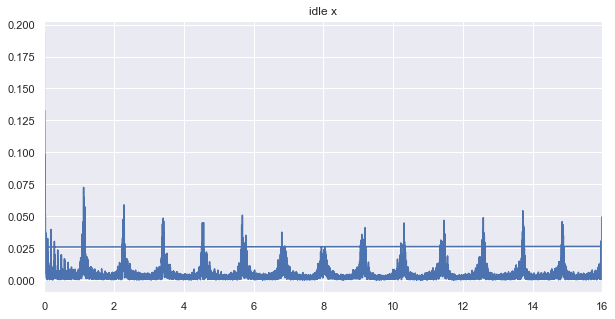

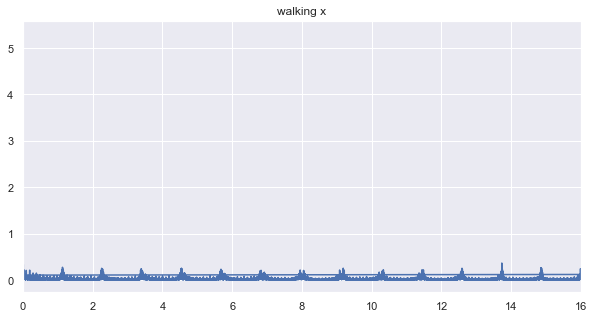

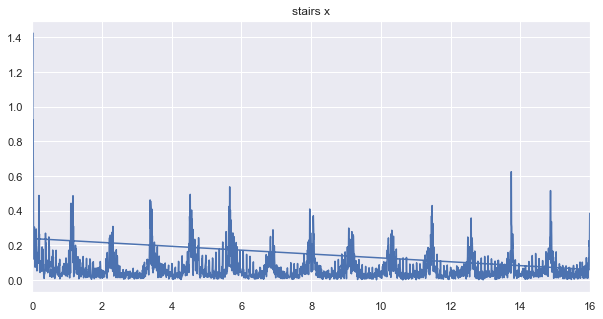

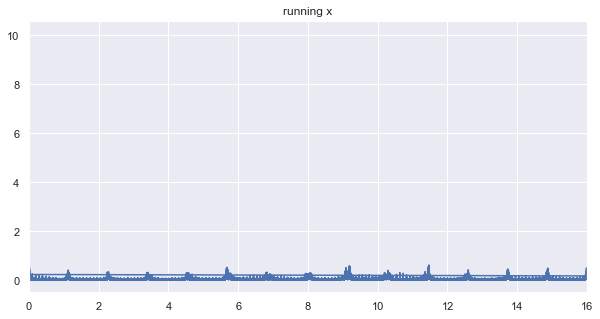

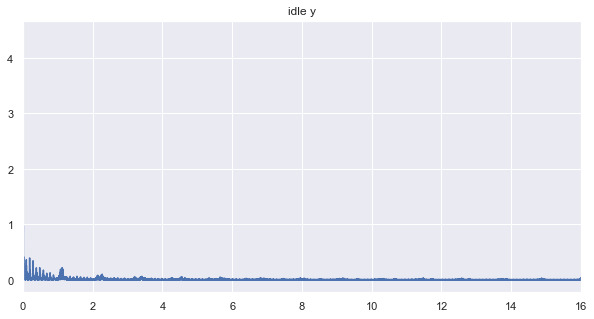

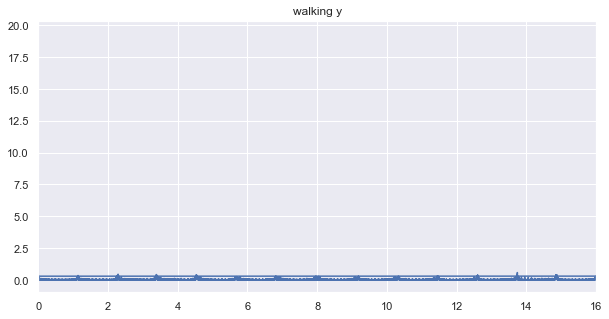

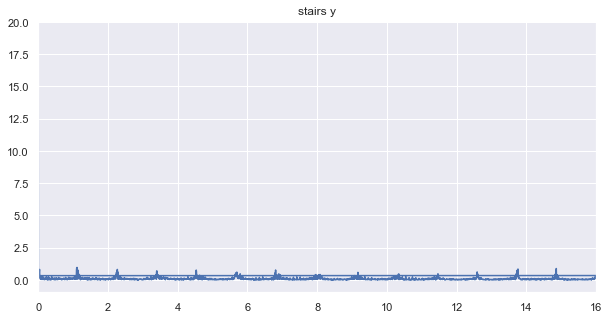

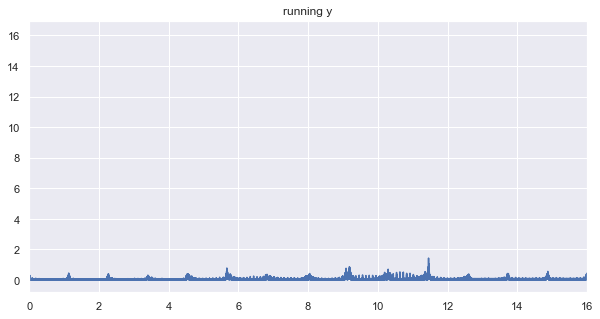

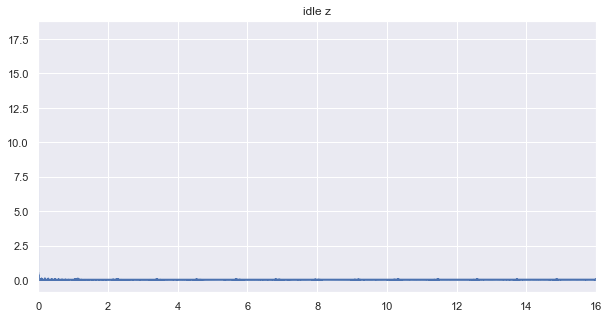

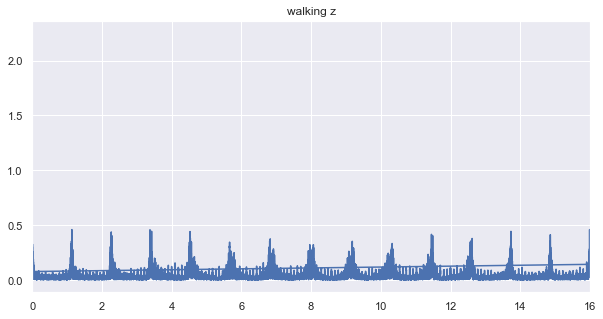

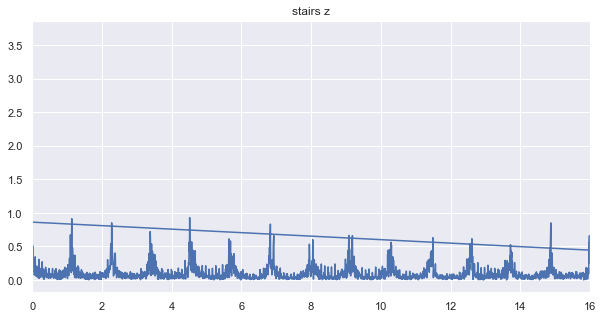

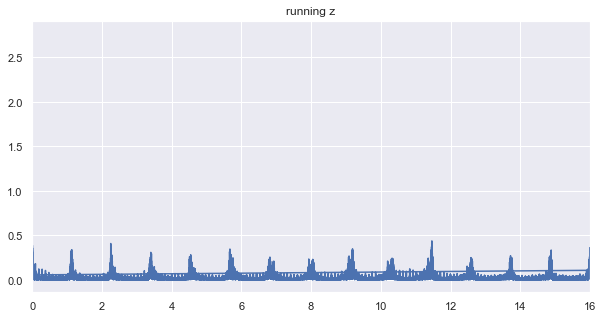

In [55]:
new_display_fft(df_idle_data["accelerometer_X"], 32.0, "idle x")
new_display_fft(df_walking_data["accelerometer_X"], 32.0, "walking x")
new_display_fft(df_stairs_data["accelerometer_X"], 32.0, "stairs x")
new_display_fft(df_running_data["accelerometer_X"], 32.0, "running x")
new_display_fft(df_idle_data["accelerometer_Y"], 32.0, "idle y")
new_display_fft(df_walking_data["accelerometer_Y"], 32.0, "walking y")
new_display_fft(df_stairs_data["accelerometer_Y"], 32.0, "stairs y")
new_display_fft(df_running_data["accelerometer_Y"], 32.0, "running y")
new_display_fft(df_idle_data["accelerometer_Z"], 32.0, "idle z")
new_display_fft(df_walking_data["accelerometer_Z"], 32.0, "walking z")
new_display_fft(df_stairs_data["accelerometer_Z"], 32.0, "stairs z")
new_display_fft(df_running_data["accelerometer_Z"], 32.0, "running z")

## Modeling
### Data split

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [57]:
df_summary = df_summary.copy().sample(frac=1).reset_index(drop=True)
df_summary.head()

,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
0,5.229735,8.786561,1.077710,8.457606,15.553314,5.646093,running,running-2125.csv
1,4.892472,7.841809,-0.173978,9.873796,14.930450,7.383176,running,running-1056.csv
2,6.039613,5.504908,3.783637,10.432466,12.038078,7.656220,running,running-2856.csv
3,5.462132,7.413566,0.768699,6.572310,11.923912,5.402151,running,running-343.csv
4,-3.975971,-8.583851,-1.565329,4.114209,6.828889,7.464158,walking,walking-1455.csv


In [58]:
Y_prediction = df_summary['label']
X_data = df_summary.drop(columns=['filename', 'label'])

In [59]:
print(X_data.shape)
print(Y_prediction.shape)

(6462, 6)
(6462,)


In [60]:
# splitting dataset for training and evaluations
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, Y_prediction, random_state = 42, shuffle= True)

In [61]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4846, 6)
(1616, 6)
(4846,)
(1616,)


In [96]:
def modelling(model_type, xtrain, xtest, ytrain, ytest):
    model = model_type
    for i in tqdm(range(25), desc='Progress'):
        model.fit(xtrain, ytrain)
    y_model = model.predict(xtest)
    print("Accuracy Score is {0}\nClassification report is below\n{1}".format(accuracy_score(ytest, y_model), classification_report(ytest, y_model)))
    return y_model

def visualizing_modelling(ytest, y_model):
    confusion = confusion_matrix(ytest, y_model)
    plot_confusion_matrix(conf_mat=confusion, figsize=(7, 10), cmap="Blues", colorbar=True, class_names=activity_folders, show_normed=True)


### 1. Modeling with SVC

In [97]:
model_svc = SVC()

Y_model = modelling(model_svc, Xtrain, Xtest, ytrain, ytest)

Progress: 100%|██████████| 25/25 [00:02<00:00, 12.31it/s]


Accuracy Score is 0.9851485148514851
Classification report is below
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       244
     running       1.00      1.00      1.00       852
      stairs       0.88      0.59      0.71        49
     walking       0.96      0.99      0.97       471

    accuracy                           0.99      1616
   macro avg       0.96      0.90      0.92      1616
weighted avg       0.98      0.99      0.98      1616



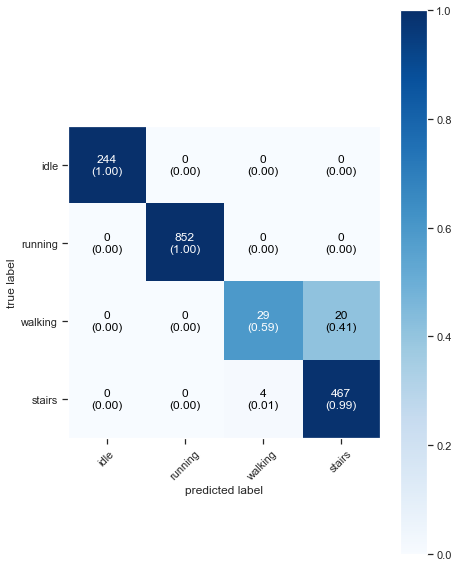

In [98]:
visualizing_modelling(ytest, Y_model)

### 2. Modeling with Random Forest

In [99]:
model_rf = RandomForestClassifier()
Y_model = modelling(model_rf, Xtrain, Xtest, ytrain, ytest)

Progress: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]


Accuracy Score is 0.995049504950495
Classification report is below
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       244
     running       1.00      1.00      1.00       852
      stairs       0.98      0.86      0.91        49
     walking       0.99      1.00      0.99       471

    accuracy                           1.00      1616
   macro avg       0.99      0.96      0.98      1616
weighted avg       1.00      1.00      0.99      1616



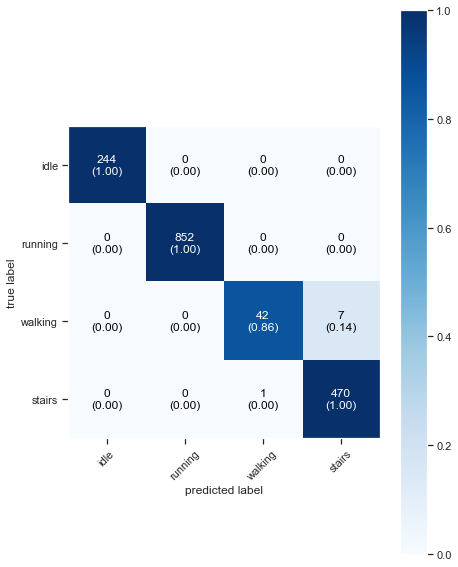

In [100]:
visualizing_modelling(ytest, Y_model)

### 3. Modeling with decision tree

In [101]:
model_svc = DecisionTreeClassifier()

Y_model = modelling(model_svc, Xtrain, Xtest, ytrain, ytest)

Progress: 100%|██████████| 25/25 [00:01<00:00, 24.92it/s]


Accuracy Score is 0.9900990099009901
Classification report is below
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       244
     running       1.00      1.00      1.00       852
      stairs       0.85      0.82      0.83        49
     walking       0.98      0.99      0.98       471

    accuracy                           0.99      1616
   macro avg       0.96      0.95      0.95      1616
weighted avg       0.99      0.99      0.99      1616



In [ ]:
visualizing_modelling(ytest, Y_model)

### 4. Modeling with logistic regression

In [102]:
model_svc = LogisticRegression()

Y_model = modelling(model_svc, Xtrain, Xtest, ytrain, ytest)

Progress:   0%|          | 0/25 [00:00<?, ?it/s]d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Progress:   4%|▍         | 1/25 [00:00<00:09,  2.49it/s]d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

Accuracy Score is 0.9851485148514851
Classification report is below
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       244
     running       1.00      1.00      1.00       852
      stairs       0.82      0.65      0.73        49
     walking       0.96      0.99      0.97       471

    accuracy                           0.99      1616
   macro avg       0.95      0.91      0.93      1616
weighted avg       0.98      0.99      0.98      1616



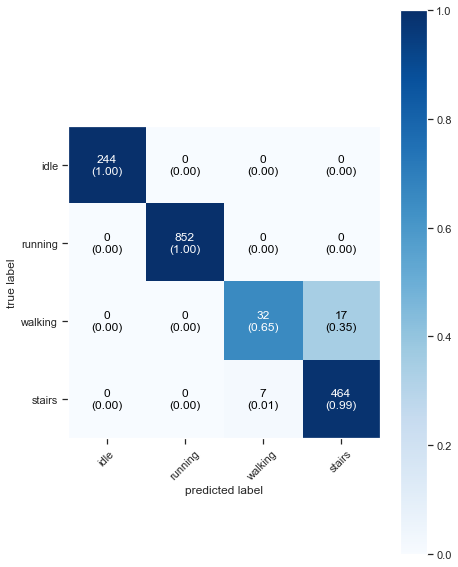

In [103]:
visualizing_modelling(ytest, Y_model)